In [1]:
import numpy as np
import matplotlib.pyplot as plt

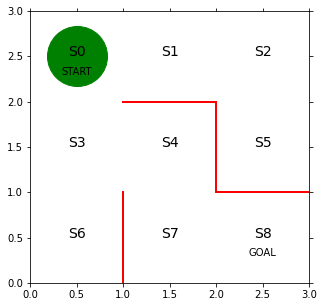

In [2]:
fig = plt.figure(figsize=(5, 5))
ax = plt.gca()

plt.plot([1, 1], [0, 1], color='red', linewidth=2)
plt.plot([1, 2], [2, 2], color='red', linewidth=2)
plt.plot([2, 2], [2, 1], color='red', linewidth=2)
plt.plot([2, 3], [1, 1], color='red', linewidth=2)

xpos = [0.5, 1.5, 2.5]
ypos = [2.5, 1.5, 0.5]
for y in range(3):
    for x in range(3):
        plt.text(xpos[x], ypos[y], 'S' + str(y * 3 + x), size=14, ha='center')
plt.text(0.5, 2.3, 'START', ha='center')
plt.text(2.5, 0.3, 'GOAL', ha='center')

ax.set_xlim(0, 3)
ax.set_ylim(0, 3)
plt.tick_params(axis='both', which='both', bottom='off', top='off',
               labelbottom='off', right='off', left='off', labelleft='off')

line, = ax.plot([0.5], [2.5], marker='o', color='g', markersize=60)


In [3]:
# 上 右 下 左
theta_0 = np.array([
    [np.nan, 1, 1, np.nan],
    [np.nan, 1, np.nan, 1],
    [np.nan, np.nan, 1, 1],
    [1, 1, 1, np.nan],
    [np.nan, np.nan, 1, 1],
    [1, np.nan, np.nan, np.nan],
    [1, np.nan, np.nan, np.nan],
    [1, 1, np.nan, np.nan],
])

In [4]:
def simple_convert_into_pi_from_theta(theta):
    [m, n] = theta.shape
    pi = np.zeros((m, n))
    for i in range(0, m):
        pi[i, :] = theta[i,:] / np.nansum(theta[i, :])
        
    pi = np.nan_to_num(pi)
    return pi
    

In [5]:
pi_0 = simple_convert_into_pi_from_theta(theta_0)
print(pi_0)

[[0.         0.5        0.5        0.        ]
 [0.         0.5        0.         0.5       ]
 [0.         0.         0.5        0.5       ]
 [0.33333333 0.33333333 0.33333333 0.        ]
 [0.         0.         0.5        0.5       ]
 [1.         0.         0.         0.        ]
 [1.         0.         0.         0.        ]
 [0.5        0.5        0.         0.        ]]


In [6]:
def get_next_s(pi, s):
    direction = ['up', 'right', 'down', 'left']
    next_direction = np.random.choice(direction, p=pi[s, :])
    
    if next_direction == 'up':
        s_next = s - 3
    elif next_direction == 'right':
        s_next = s + 1
    elif next_direction == 'down':
        s_next = s + 3
    elif next_direction == 'left':
        s_next = s - 1
    return s_next
    
    

In [7]:
def goal_maze(pi):
    s = 0
    state_history = [0]
    
    while True:
        next_s = get_next_s(pi, s)
        state_history.append(next_s)
        
        if next_s == 8:
            break
        else:
            s = next_s
    return state_history

In [8]:
state_history = goal_maze(pi_0)

In [9]:
print(state_history)

[0, 3, 4, 7, 4, 7, 4, 7, 8]


In [10]:
from matplotlib import animation
from IPython.display import HTML

In [11]:
def init():
    line.set_data([], [])
    return (line,)

In [12]:
def animate(i):
    state = state_history[i]
    x = (state % 3) + 0.5
    y = 2.5 - int(state / 3)
    line.set_data(x, y)
    return (line,)

In [13]:
anim = animation.FuncAnimation(fig, animate, init_func=init, frames=len(state_history),
                               interval=200, repeat=False)

HTML(anim.to_jshtml())

In [14]:
def softmax_convert_into_pi_from_theta(theta):
    
    beta = 1.0
    [m, n] = theta.shape
    pi = np.zeros((m, n))
    
    exp_theta = np.exp(theta)
    
    for i in range(0, m):
        pi[i, :] = exp_theta[i,:] / np.nansum(exp_theta[i, :])
        
    pi = np.nan_to_num(pi)
    return pi
    

In [15]:
pi_0 = softmax_convert_into_pi_from_theta(theta_0)

In [16]:
print(pi_0)

[[0.         0.5        0.5        0.        ]
 [0.         0.5        0.         0.5       ]
 [0.         0.         0.5        0.5       ]
 [0.33333333 0.33333333 0.33333333 0.        ]
 [0.         0.         0.5        0.5       ]
 [1.         0.         0.         0.        ]
 [1.         0.         0.         0.        ]
 [0.5        0.5        0.         0.        ]]


In [17]:
def get_action_and_next_s(pi, s):
    direction = ['up', 'right', 'down', 'left']
    next_direction = np.random.choice(direction, p=pi[s,:])
    if next_direction == 'up':
        action = 0
        s_next = s - 3
    elif next_direction == 'right':
        action = 1
        s_next = s + 1
    elif next_direction == 'down':
        action = 2
        s_next = s + 3
    elif next_direction == 'left':
        action = 3
        s_next = s - 1
    return action, s_next
    

In [28]:
def goal_maze_ret_s_a(pi):
    s = 0
    state_history = [[0, np.nan]]
    
    while True:
        action, next_s = get_action_and_next_s(pi, s)
        state_history[-1][1] = action
        
        state_history.append([next_s, np.nan])
        
        
        if next_s == 8:
            break
        else:
            s = next_s
    return state_history

In [45]:
s_a_history = goal_maze_ret_s_a(pi_0)
print(s_a_history)


[[0, 1], [1, 3], [0, 1], [1, 3], [0, 1], [1, 3], [0, 1], [1, 1], [2, 2], [5, 0], [2, 3], [1, 3], [0, 2], [3, 1], [4, 2], [7, 0], [4, 3], [3, 2], [6, 0], [3, 1], [4, 2], [7, 1], [8, nan]]


In [46]:
def update_theta(theta, pi, s_a_history):
    eta = 0.1
    T = len(s_a_history) - 1
    m, n = theta.shape
    delta_theta = theta.copy()
    
    for i in range(0, m):
        for j in range(0, n):
            if not(np.isnan(theta[i, j])):
                SA_i = [SA for SA in s_a_history if SA[0] == i]
                SA_ij = [SA for SA in s_a_history if SA == [i, j]]
                N_i = len(SA_i)
                N_ij = len(SA_ij)
                
                delta_theta[i, j] = (N_ij - pi[i, j] * N_i) / T
    new_theta = theta + eta * delta_theta
    return new_theta

In [47]:
new_theta = update_theta(theta_0, pi_0, s_a_history)
pi = softmax_convert_into_pi_from_theta(new_theta)
print(pi)

[[0.    0.503 0.497 0.   ]
 [0.    0.497 0.    0.503]
 [0.    0.    0.5   0.5  ]
 [0.332 0.335 0.333 0.   ]
 [0.    0.    0.501 0.499]
 [1.    0.    0.    0.   ]
 [1.    0.    0.    0.   ]
 [0.5   0.5   0.    0.   ]]


In [48]:
stop_eps = 10 ** -4
theta = theta_0
pi = pi_0

is_continue = True
count = 1

while is_continue:
    s_a_history = goal_maze_ret_s_a(pi)
    new_theta = update_theta(theta, pi, s_a_history)
    new_pi = softmax_convert_into_pi_from_theta(new_theta)
    
    print(np.sum(np.abs(new_pi - pi)))
    print('Use', len(s_a_history) - 1, 'steps')
    
    if np.sum(np.abs(new_pi - pi)) < stop_eps:
        is_continue = False
    else:
        theta = new_theta
        pi = new_pi

0.0058891753208553665
Use 50 steps
0.008577971356989178
Use 122 steps
0.013793047788394464
Use 46 steps
0.014596958911094693
Use 10 steps
0.023278571670416248
Use 12 steps
0.008562266494818227
Use 140 steps
0.016411055429187082
Use 30 steps
0.015467247896180703
Use 14 steps
0.011210313281112882
Use 100 steps
0.005461000684211126
Use 70 steps
0.007057519275940394
Use 32 steps
0.04852129332956845
Use 4 steps
0.01279018468864257
Use 80 steps
0.012029268538986504
Use 100 steps
0.048103347047705414
Use 4 steps
0.018927232422962237
Use 24 steps
0.02403805529870834
Use 8 steps
0.026035869674177314
Use 30 steps
0.02177566644673401
Use 12 steps
0.015037193736052279
Use 58 steps
0.015979844077740113
Use 20 steps
0.0268401964428846
Use 16 steps
0.009792766465585967
Use 64 steps
0.010095214287201337
Use 50 steps
0.02357926564101187
Use 8 steps
0.024463463292103915
Use 14 steps
0.011468180367481151
Use 66 steps
0.006802258326879251
Use 50 steps
0.01535034551703457
Use 16 steps
0.015768604721236867


0.014010241608737456
Use 6 steps
0.012135557807737687
Use 6 steps
0.010032710301222353
Use 4 steps
0.009910896958264831
Use 4 steps
0.009030920420072017
Use 6 steps
0.01603832873128337
Use 12 steps
0.009231151045244565
Use 6 steps
0.009926163727065937
Use 4 steps
0.013731306186332642
Use 6 steps
0.016150294354803946
Use 8 steps
0.009837054296701828
Use 4 steps
0.009718122929979145
Use 4 steps
0.009601099011357361
Use 4 steps
0.015897854315368026
Use 6 steps
0.009167030664821982
Use 6 steps
0.01339824552961938
Use 6 steps
0.009463370412620714
Use 4 steps
0.009350601239944453
Use 4 steps
0.012315998904302364
Use 8 steps
0.009277210136514946
Use 4 steps
0.009167575661303412
Use 4 steps
0.009059669229399367
Use 4 steps
0.012261118886537997
Use 8 steps
0.013009612925611938
Use 6 steps
0.015478474651895807
Use 6 steps
0.008983347918532503
Use 4 steps
0.008878562111478694
Use 4 steps
0.011409049995740689
Use 6 steps
0.008800568056258687
Use 4 steps
0.0088227174774195
Use 6 steps
0.01133678740

0.0029577893652779144
Use 4 steps
0.0029348693388685856
Use 4 steps
0.002912209367925786
Use 4 steps
0.0028898056132783193
Use 4 steps
0.0028676543046291386
Use 4 steps
0.002845751739125421
Use 4 steps
0.0028240942799567445
Use 4 steps
0.005312515115001047
Use 6 steps
0.0028198246712514696
Use 4 steps
0.009791544058408957
Use 8 steps
0.002830060537739161
Use 4 steps
0.0060839048324783235
Use 6 steps
0.0028171548973493984
Use 4 steps
0.005462278939753741
Use 6 steps
0.00281889535287793
Use 4 steps
0.002797665689712077
Use 4 steps
0.0027766694136392364
Use 4 steps
0.006067762071390155
Use 6 steps
0.0027653606528861424
Use 4 steps
0.00543524723311168
Use 6 steps
0.006479437198174037
Use 6 steps
0.007574763206657557
Use 8 steps
0.00620468532048659
Use 6 steps
0.0066341533420851695
Use 6 steps
0.002887055062315333
Use 4 steps
0.0028649513625743223
Use 4 steps
0.0028430953221810704
Use 4 steps
0.0028214833313513973
Use 4 steps
0.0028001118442689404
Use 4 steps
0.0027789773777685337
Use 4 ste

0.0010475459541667634
Use 4 steps
0.001042537708187713
Use 4 steps
0.01559247765351987
Use 24 steps
0.003700348321666415
Use 6 steps
0.0010550721816107167
Use 4 steps
0.001049999479044078
Use 4 steps
0.001044963054344851
Use 4 steps
0.0010399625647476221
Use 4 steps
0.001034997671491622
Use 4 steps
0.007198042230357138
Use 6 steps
0.001035127321545308
Use 4 steps
0.00103021188365858
Use 4 steps
0.0010253311373878068
Use 4 steps
0.00102048475932872
Use 4 steps
0.001015672429805388
Use 4 steps
0.0010108938328185074
Use 4 steps
0.0010061486559946597
Use 4 steps
0.0010014365905405206
Use 4 steps
0.0009967573311885913
Use 4 steps
0.0009921105761544202
Use 4 steps
0.0009874960270866706
Use 4 steps
0.000982913389022691
Use 4 steps
0.000978362370341171
Use 4 steps
0.003605114435934295
Use 6 steps
0.00098947392085999
Use 4 steps
0.0009848631294358534
Use 4 steps
0.000980284330781872
Use 4 steps
0.005429003822857603
Use 8 steps
0.0010024780601363345
Use 4 steps
0.006142634757726369
Use 14 steps


0.0004917838898146239
Use 4 steps
0.0004901430313836268
Use 4 steps
0.0004885103816091065
Use 4 steps
0.0034253343981237618
Use 8 steps
0.0004981045293539453
Use 4 steps
0.0004964284509786573
Use 4 steps
0.000494760835699895
Use 4 steps
0.0004931016265726715
Use 4 steps
0.0004914507671285803
Use 4 steps
0.0004898082013733984
Use 4 steps
0.00048817387378111837
Use 4 steps
0.00048654772928884496
Use 4 steps
0.0004849297132936796
Use 4 steps
0.0004833197716468812
Use 4 steps
0.000481717850649252
Use 4 steps
0.0004801238970485802
Use 4 steps
0.0004785378580311542
Use 4 steps
0.00047695968122327473
Use 4 steps
0.0004753893146812495
Use 4 steps
0.00047382670689021314
Use 4 steps
0.000472271806759416
Use 4 steps
0.005957116852942382
Use 6 steps
0.00047371867462541253
Use 4 steps
0.0022288344611604907
Use 6 steps
0.0004761626158888699
Use 4 steps
0.0004746048824112205
Use 4 steps
0.00047305477754528216
Use 4 steps
0.00047151225158265087
Use 4 steps
0.0004699772552160045
Use 4 steps
0.000468449

0.00029915968449951286
Use 4 steps
0.0002983816866574708
Use 4 steps
0.0002976067209582711
Use 4 steps
0.000296834771658018
Use 4 steps
0.000296065823112316
Use 4 steps
0.00029529985977996484
Use 4 steps
0.0002945368662179322
Use 4 steps
0.00029377682708488576
Use 4 steps
0.0002930197271388095
Use 4 steps
0.0002922655512335934
Use 4 steps
0.00029151428432279067
Use 4 steps
0.0002907659114542195
Use 4 steps
0.0002900204177756459
Use 4 steps
0.00028927778852612385
Use 4 steps
0.00028853800904007215
Use 4 steps
0.0002878010647478571
Use 4 steps
0.0018607037329651487
Use 6 steps
0.00029141881204287207
Use 4 steps
0.0019547927344367964
Use 6 steps
0.0019000293389436138
Use 6 steps
0.0002998637011479635
Use 4 steps
0.0002990790960319019
Use 4 steps
0.00029829757459087086
Use 4 steps
0.00029751912064938935
Use 4 steps
0.0002967437181394181
Use 4 steps
0.00029597135109735856
Use 4 steps
0.00029520200366418836
Use 4 steps
0.00029443566008434396
Use 4 steps
0.0002936723047045377
Use 4 steps
0.00

0.00023729962649669464
Use 4 steps
0.00023673100151971882
Use 4 steps
0.000236164448867357
Use 4 steps
0.00023559995837508368
Use 4 steps
0.00023503751994056327
Use 4 steps
0.0002344771235256657
Use 4 steps
0.00023391875915247315
Use 4 steps
0.00023336241690465748
Use 4 steps
0.00023280808692620336
Use 4 steps
0.00023225575942294185
Use 4 steps
0.0002317054246589352
Use 4 steps
0.0017757573812992831
Use 6 steps
0.00023507757456037864
Use 4 steps
0.00023451615806237627
Use 4 steps
0.00023395678151743107
Use 4 steps
0.00023339943495000876
Use 4 steps
0.0013979354067645972
Use 6 steps
0.00023456211071688424
Use 4 steps
0.00023400457670115504
Use 4 steps
0.00023344905588863415
Use 4 steps
0.0018075057714632033
Use 6 steps
0.00023698257770692413
Use 4 steps
0.00023641504499619104
Use 4 steps
0.0002358495790069741
Use 4 steps
0.0018476001994186843
Use 6 steps
0.00023960038302169376
Use 4 steps
0.0002390216723762821
Use 4 steps
0.00023844509017385135
Use 4 steps
0.0002378706258696836
Use 4 st

0.0001980185812760077
Use 4 steps
0.0001975858816260015
Use 4 steps
0.00019715461760056244
Use 4 steps
0.00019672478279754955
Use 4 steps
0.00019629637084934287
Use 4 steps
0.00019586937542526855
Use 4 steps
0.00019544379022847294
Use 4 steps
0.0023281963230727554
Use 8 steps
0.00020038505377238149
Use 4 steps
0.000199943225951656
Use 4 steps
0.00135768150927623
Use 6 steps
0.00020129826973317583
Use 4 steps
0.00020085478971330374
Use 4 steps
0.0002004127924165565
Use 4 steps
0.00019997227118408525
Use 4 steps
0.00019953321939349122
Use 4 steps
0.00019909563045901295
Use 4 steps
0.00019865949783264003
Use 4 steps
0.00019822481500277912
Use 4 steps
0.0001977915754959366
Use 4 steps
0.00019735977287317456
Use 4 steps
0.00019692940073038484
Use 4 steps
0.00019650045270316017
Use 4 steps
0.00019607292245948926
Use 4 steps
0.00019564680370387326
Use 4 steps
0.0001952220901754835
Use 4 steps
0.0001947987756492544
Use 4 steps
0.00019437685393326742
Use 4 steps
0.00019395631887102714
Use 4 ste

0.00012162030308746768
Use 4 steps
0.00012141601301569362
Use 4 steps
0.00012121223980527361
Use 4 steps
0.00012100898170711201
Use 4 steps
0.00012080623697793315
Use 4 steps
0.011261751334884523
Use 8 steps
0.00012133406548348567
Use 4 steps
0.00012113099294001027
Use 4 steps
0.00012092843183647561
Use 4 steps
0.00012072638045119467
Use 4 steps
0.0001205248370685693
Use 4 steps
0.00012032379998171312
Use 4 steps
0.00012012326748915038
Use 4 steps
0.00011992323789756544
Use 4 steps
0.00011972370952118526
Use 4 steps
0.0001195246806803621
Use 4 steps
0.00011932614970311395
Use 4 steps
0.00011912811492321464
Use 4 steps
0.00011893057468452192
Use 4 steps
0.0001187335273336379
Use 4 steps
0.00011853697122827384
Use 4 steps
0.0001183409047285245
Use 4 steps
0.00011814532620590262
Use 4 steps
0.00011795023403582579
Use 4 steps
0.0001177556266004718
Use 4 steps
0.00011756150229050126
Use 4 steps
0.0001173678595021866
Use 4 steps
0.00011717469663801577
Use 4 steps
0.00011698201210760817
Use 4

0.00010415830782006287
Use 4 steps
0.00010399805946420017
Use 4 steps
0.00010383818074515515
Use 4 steps
0.00010367867052503421
Use 4 steps
0.00010351952767181233
Use 4 steps
0.00010336075105685412
Use 4 steps
0.00010320233955532672
Use 4 steps
0.0001030442920489389
Use 4 steps
0.00010288660742092948
Use 4 steps
0.00010272928456008142
Use 4 steps
0.0001025723223609977
Use 4 steps
0.00010241571971956326
Use 4 steps
0.00010225947553722803
Use 4 steps
0.000102103588720686
Use 4 steps
0.00010194805817893317
Use 4 steps
0.00010179288282691906
Use 4 steps
0.00010163806158190562
Use 4 steps
0.00010148359336698866
Use 4 steps
0.00010132947710728146
Use 4 steps
0.00010117571173544511
Use 4 steps
0.00010102229618418924
Use 4 steps
0.00010086922939304098
Use 4 steps
0.00010071651030426655
Use 4 steps
0.004375078151271777
Use 6 steps
0.0001016273808667461
Use 4 steps
0.00010147327962527382
Use 4 steps
0.00010131952829778475
Use 4 steps
0.00010116612582524408
Use 4 steps
0.0001010130711528931
Use 4

In [49]:
np.set_printoptions(precision=3, suppress=True)
print(pi)

[[0.    0.014 0.986 0.   ]
 [0.    0.264 0.    0.736]
 [0.    0.    0.477 0.523]
 [0.011 0.978 0.011 0.   ]
 [0.    0.    0.984 0.016]
 [1.    0.    0.    0.   ]
 [1.    0.    0.    0.   ]
 [0.014 0.986 0.    0.   ]]


In [52]:
def animate(i):
    state = s_a_history[i][0]
    x = (state % 3) + 0.5
    y = 2.5 - int(state / 3)
    line.set_data(x, y)
    return (line,)

anim = animation.FuncAnimation(fig, animate, init_func=init, frames=len(s_a_history),
                              interval=200, repeat=False)
HTML(anim.to_jshtml())